In [5]:
'''
1.)	A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between 
two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences 
at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
File: Cutlets.csv
'''

'\n1.)\tA F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between \ntwo units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences \nat 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.\nFile: Cutlets.csv\n'

In [14]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind
from scipy import stats

In [15]:
# Load the dataset
df=pd.read_csv("Cutlets.csv")

In [16]:
#Display first few rows
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [17]:
# Step 1: Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Unit A     Unit B
count  35.000000  35.000000
mean    7.019091   6.964297
std     0.288408   0.343401
min     6.437600   6.038000
25%     6.831500   6.753600
50%     6.943800   6.939900
75%     7.280550   7.195000
max     7.516900   7.545900


In [18]:
# Step 2: Check Normality using Histogram and Boxplot
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


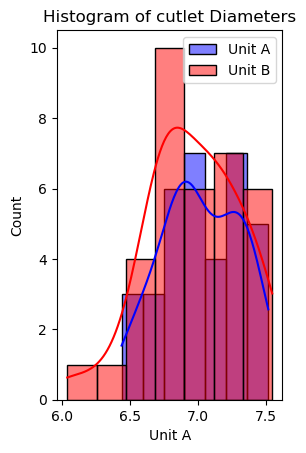

In [19]:
#Histogram
plt.subplot(1,2,1)
sns.histplot(df['Unit A'],kde=True, color='blue',label='Unit A')
sns.histplot(df['Unit B'],kde=True, color='red', label='Unit B')
plt.title("Histogram of cutlet Diameters")
plt.legend()

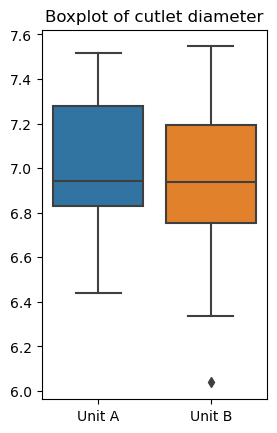

In [20]:
#Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df)
plt.title("Boxplot of cutlet diameter")
plt.show()

In [21]:
# Step 3: Perform Shapiro-Wilk Test for Normality
stat1, p1 = shapiro(df['Unit A'])
stat2, p2 = shapiro(df['Unit B'])

In [22]:
print("\nShapiro-Wilk Test Results:")
print(f"Unit A: W-statistic = {stat1:.4f}, p-value = {p1:.4f}")
print(f"Unit B: W-statistic = {stat2:.4f}, p-value = {p2:.4f}")


Shapiro-Wilk Test Results:
Unit A: W-statistic = nan, p-value = 1.0000
Unit B: W-statistic = nan, p-value = 1.0000


In [23]:
if p1 > 0.05 and p2 > 0.05:
    print("Both samples are normally distributed.\n")
else:
    print("At least one sample is not normally distributed. Consider non-parametric tests.\n")

Both samples are normally distributed.



In [24]:
# Step 4: Check Homogeneity of Variance using Levene’s test
stat_lev, p_lev = levene(df['Unit A'], df['Unit B'])

In [25]:
print("\nLevene’s Test for Equal Variance:")
print(f"Levene’s Statistic = {stat_lev:.4f}, p-value = {p_lev:.4f}")


Levene’s Test for Equal Variance:
Levene’s Statistic = nan, p-value = nan


In [26]:
if p_lev > 0.05:
    print("Variances are equal. Proceed with Student’s t-test.\n")
else:
    print("Variances are not equal. Proceed with Welch’s t-test.\n")

Variances are not equal. Proceed with Welch’s t-test.



In [27]:
# Step 5: Perform Two-Sample t-test
stat_t, p_t = ttest_ind(df['Unit A'], df['Unit B'], equal_var=(p_lev > 0.05))

In [28]:
print("\nTwo-Sample t-test Results:")
print(f"t-statistic = {stat_t:.4f}, p-value = {p_t:.4f}")


Two-Sample t-test Results:
t-statistic = nan, p-value = nan


In [29]:
# Step 6: Conclusion
if p_t < 0.05:
    print("\nConclusion: Reject the null hypothesis (H0).")
    print("There is a significant difference in the mean diameters of cutlets between the two units.\n")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H0).")
    print("There is NO significant difference in the mean diameters of cutlets between the two units.\n")


Conclusion: Fail to reject the null hypothesis (H0).
There is NO significant difference in the mean diameters of cutlets between the two units.

